# Programming for Data Analysis Project 2019

For this project a simulated data set was created by simulating a real-world phenomenon of my choosing, in my case it was craeted using 2015 world cup data. Then, rather than collect data related to the this phenomenon, I modeled and synthesise such data using Python and numpy.random.

The criteria were as follows:

1. Choose a real-world phenomenon that can be measured and for which you couldcollect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


In [1]:
# Import of packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2015 Rugby World Cup Data

![](WC.PNG)

As I have a great interest in Rugby I chose to simulate some data using this type of data form 2015 Rugby World Cup.

The data for each player in the Rugby World Cup 2015 was obtained from http://www.rugbyworldcup.com/. This data is owned by the Rugby World Cup Ltd (RWC) and can not be used for commercial purposes unless by prior written permission from the RWC.

For each player, the following was recorded:

1. team played for (team)
2. name (name)
3. number of international matches played (caps)
4. position (position)
5. number of years since debuted (years_since_debut)
6. date of debut (debut)
7. age at Rugby World Cup 2015 (age)
8. age minus years_since_debut (approx_age_debuted)
9. height in cm (height_cm)
10. weight in kg (weight_kg)
 
The four variables I will select for data simulation were will be Age, Weight, Height and Caps.

In [54]:
# Impotred CSV file directly from web link and got unicode error so used 'latin-1' to read file

df = pd.read_csv("http://teaching.statistics-is-awesome.org/wp-content/uploads/2015/11/rubgy_world_cup_20151.csv", encoding='latin-1')

In [3]:
# drop null values to clean data

df.dropna(inplace = True)  

In [22]:
# view dataframe

df

,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg
0,Australia,Stephen Moore,102.0,Hooker,10.5,11-Jun-05,32,22,186,112
1,Japan,Male Sau,26.0,Centre,2.6,20-Apr-13,28,25,183,97
2,South Africa,Pieter-Steph Du Toit,8.0,Lock,2.0,9-Nov-13,23,21,200,115
3,Japan,Harumichi Tatekawa,43.0,Centre,3.6,28-Apr-12,25,21,181,94
4,New Zealand,Beauden Barrett,36.0,Fly Half,3.4,23-Jun-12,24,21,187,91
5,Argentina,Martín Landajo,52.0,Scrum Half,5.5,21-May-10,27,22,171,81
6,New Zealand,Ben Smith,48.0,Wing,6.0,14-Nov-09,29,23,186,94
7,Scotland,David Denton,32.0,Back Row,4.3,6-Aug-11,25,21,196,114
8,Samoa,Wayne Ole Avei,24.0,Hooker,4.4,2-Jul-11,32,28,178,114
9,Japan,Hitoshi Ono,96.0,Lock,11.5,16-May-04,37,26,192,106


In [23]:
# get number of rows and colums

df.shape

(643, 10)

In [24]:
# Check for nulls, removed using code above

df.isnull().sum()

team                  0
name                  0
caps                  0
position              0
years_since_debut     0
debut                 0
age                   0
approx_age_debuted    0
height_cm             0
weight_kg             0
dtype: int64

In [25]:
# view the data types for each column

df.dtypes

team                   object
name                   object
caps                  float64
position               object
years_since_debut     float64
debut                  object
age                     int64
approx_age_debuted      int64
height_cm               int64
weight_kg               int64
dtype: object

In [26]:
# view some statistical data using describe function

df.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,32.416796,5.051477,27.732504,22.864697,186.124417,102.937792
std,25.046322,3.618154,3.741239,2.759641,7.223409,12.840594
min,1.000000,0.100000,19.000000,18.000000,165.000000,65.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000


In [9]:
# Calculate breakdown of positions

positionbreakdown = df[['position','team']]
positionbreakdown = positionbreakdown.groupby(['position'])['team'].aggregate('count').reset_index().sort_values('position')

total = positionbreakdown['team'].aggregate('sum')

positionbreakdown['% proportion'] =  (positionbreakdown['team'] / total * 100).round()

positionbreakdown

,position,team,% proportion
0,Back Row,121,19.0
1,Centre,72,11.0
2,Fly Half,48,7.0
3,Full Back,33,5.0
4,Hooker,56,9.0
5,Lock,74,12.0
6,Prop,107,17.0
7,Scrum Half,53,8.0
8,Utility Back,3,0.0
9,Utility Forward,2,0.0


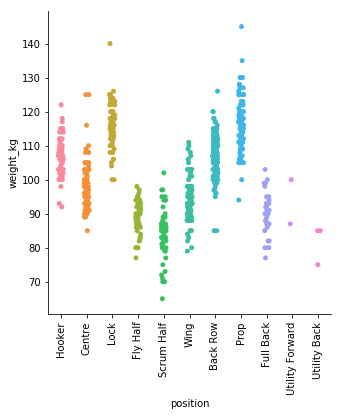

In [10]:
# comparison of weights to position

chart = sns.catplot(x="position", y="weight_kg",data=df)
chart.set_xticklabels(rotation=90)
plt.show('chart')

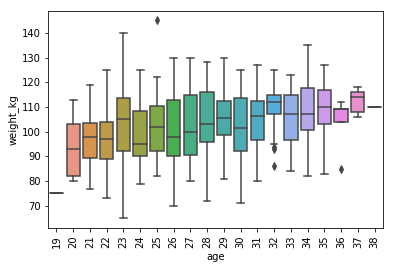

In [58]:
plot = sns.boxplot(x="age", y="weight_kg", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

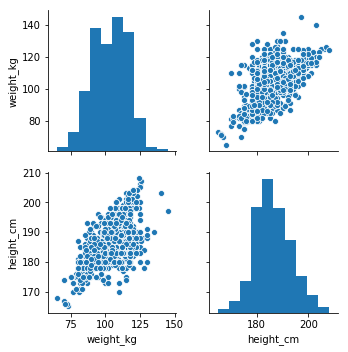

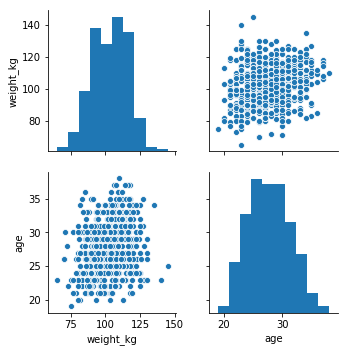

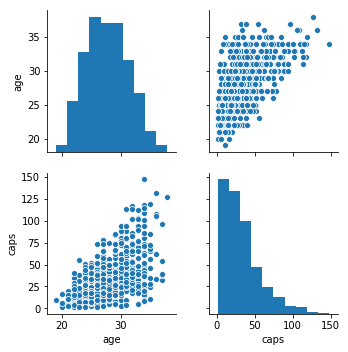

In [27]:
plot_1 = sns.pairplot(df, vars=["weight_kg", "height_cm"])
plt.show('plot_1')

plot_2 = sns.pairplot(df, vars=["weight_kg", "age"])
plt.show('plot_2')

plot_3 = sns.pairplot(df, vars=["age", "caps"])
plt.show('plot_3')


# Simultaion of Data using numpy.random

In [42]:
# use of numpy random to genearte random numbers on height using Max (208cm) and Min (165cm) values of height from dataset CSV
# following a uniform distribution

Height = (np.random.uniform(low=165, high=208, size=643)).round(2)
print(Height)

[193.   188.22 173.64 181.42 172.31 189.7  201.31 193.31 201.45 206.32
 173.98 171.82 205.91 195.42 200.8  177.69 180.95 165.82 167.64 170.2
 183.64 188.1  179.44 185.99 169.56 200.42 205.63 185.02 167.2  169.
 205.29 203.2  167.54 166.62 165.26 184.35 175.56 181.04 175.46 200.8
 207.22 185.68 170.98 205.11 200.13 194.56 178.94 177.6  205.92 172.26
 203.73 204.28 188.66 191.29 198.47 194.61 207.21 203.62 203.08 192.08
 176.14 177.66 195.34 165.5  181.04 207.1  168.96 177.81 165.69 177.02
 173.83 186.76 194.44 199.15 176.72 204.31 202.77 178.87 204.49 189.05
 183.04 184.25 165.2  189.42 195.85 176.6  178.14 165.58 196.8  182.68
 169.69 187.25 172.84 173.83 187.08 203.1  184.58 177.99 172.6  184.9
 171.68 192.54 198.4  184.51 182.52 187.72 198.48 174.62 167.69 192.85
 182.5  180.79 192.07 183.74 176.85 202.31 174.96 188.81 166.02 193.8
 179.68 192.19 168.48 189.88 173.73 167.19 198.66 202.19 207.44 202.27
 190.48 180.24 171.24 195.38 193.39 182.43 204.54 188.82 180.83 167.12
 184.53 202.

In [43]:
# use of numpy randint to genearte random numbers on age using Max (38yrs) and Min (19yrs) values of age from dataset CSV

Age = (np.random.randint(low=19, high=38, size=643))
print(Age)

[36 19 32 37 24 28 37 33 33 26 19 32 35 34 31 29 22 25 28 23 27 29 32 34
 34 19 33 21 22 33 29 27 22 37 25 25 32 30 35 34 35 36 31 19 26 27 36 37
 26 22 24 30 22 34 25 19 24 28 20 32 34 22 33 37 28 21 34 21 36 35 35 24
 19 30 36 20 26 35 26 37 23 30 25 37 31 27 35 20 19 37 24 20 34 30 34 37
 34 32 25 29 36 29 30 21 36 27 32 35 37 22 24 29 33 27 34 27 31 23 33 24
 37 32 22 32 28 26 34 30 24 30 19 31 27 27 19 35 34 27 32 33 33 30 19 36
 37 24 19 35 31 22 30 20 28 23 32 31 24 31 36 32 23 32 27 31 30 32 32 36
 25 37 34 20 33 28 35 33 37 34 26 31 22 20 35 32 22 26 27 34 28 28 20 25
 24 34 29 20 34 34 37 24 32 36 20 28 25 37 37 28 27 25 37 25 22 19 37 29
 31 27 28 27 34 33 34 26 36 37 35 33 23 31 24 19 32 23 21 30 28 27 19 36
 35 22 33 25 34 33 19 30 21 31 35 36 36 37 36 30 23 34 32 22 26 29 30 22
 31 22 35 30 37 34 23 33 22 36 33 36 33 22 29 32 21 33 32 29 37 37 35 21
 20 35 28 24 23 27 24 23 35 22 30 32 34 24 33 23 23 34 36 20 33 32 37 36
 34 19 37 20 24 32 19 19 30 32 23 21 26 35 24 31 20

In [44]:
# use of numpy randint to genearte random numbers on caps using Max (148) and Min (1) values of caps from dataset CSV

Caps = (np.random.randint(low=1, high=148, size=643))
print(Caps)

[ 35  10  89  83 134 112  75 130  73  89  51 139  56 121  32  65  70  13
  45  86 115  85  80 144 116  64  50  59 118  85  56  94  27 128  47  26
  52  15  85 117  67 143  75 115 135  44  66 117 143  97  12  32  21  44
 128   6 108 126 115   4  66  43 135  33  66  30  86 125 120 146 119  67
 100 136 124  82  15  94  93 116 114 105  68  30  60 136  30  13 125  84
  50 139 107  11 134  38  96 120  11  85  18  30  21  17  28 147  50  29
  41  14 114  94  64  77 101  33  23 114  12  84 107 114 115  98 146 131
  34 135  27  15  12 108   5 111  55  71  27 101  28  90 137 104 110 135
 100  17  57  95  81 124  99 111  26  52  22  92 123 124  98  96 131 141
  39  41  15  41 133 123   9  79 103  58 116  48  54  95 117 143 110   5
  19 137  80   2  15 130  73 113 146 104  21   2  59 124  97 112  61 143
  28 145  70  21  65  10  86  11  66  65  38  17  97 145  34  78  35 108
 146 129 105 129  18 131 104 143  26  84  52  86  96 119  63  50  82 135
  25  78  68  23  51 118  96 119  24  35 141  17 11

In [45]:
# use of numpy random to genearte random numbers on weight using Max (145 kg) and Min (65 kg) values of weight from dataset CSV

Weight = (np.random.uniform(low=65, high=145, size=643)).round(2)
print(Height)

[193.   188.22 173.64 181.42 172.31 189.7  201.31 193.31 201.45 206.32
 173.98 171.82 205.91 195.42 200.8  177.69 180.95 165.82 167.64 170.2
 183.64 188.1  179.44 185.99 169.56 200.42 205.63 185.02 167.2  169.
 205.29 203.2  167.54 166.62 165.26 184.35 175.56 181.04 175.46 200.8
 207.22 185.68 170.98 205.11 200.13 194.56 178.94 177.6  205.92 172.26
 203.73 204.28 188.66 191.29 198.47 194.61 207.21 203.62 203.08 192.08
 176.14 177.66 195.34 165.5  181.04 207.1  168.96 177.81 165.69 177.02
 173.83 186.76 194.44 199.15 176.72 204.31 202.77 178.87 204.49 189.05
 183.04 184.25 165.2  189.42 195.85 176.6  178.14 165.58 196.8  182.68
 169.69 187.25 172.84 173.83 187.08 203.1  184.58 177.99 172.6  184.9
 171.68 192.54 198.4  184.51 182.52 187.72 198.48 174.62 167.69 192.85
 182.5  180.79 192.07 183.74 176.85 202.31 174.96 188.81 166.02 193.8
 179.68 192.19 168.48 189.88 173.73 167.19 198.66 202.19 207.44 202.27
 190.48 180.24 171.24 195.38 193.39 182.43 204.54 188.82 180.83 167.12
 184.53 202.

In [48]:
# Build dataframe for positions and braekdown using random choice and probability based on braekdown from CSV file

# Set Array
Position = ['Back Row','Centre', 'Fly Half','Full Back','Hooker','Lock','Prop','Scrum Half','Wing']

# Build Dataframe 
pos = np.random.choice(Position, 643, p=[0.19, 0.11,0.07,0.05,0.09,0.12,0.17,0.08,0.12])

print(pos)


['Back Row' 'Centre' 'Fly Half' 'Prop' 'Hooker' 'Centre' 'Back Row' 'Prop'
 'Prop' 'Full Back' 'Wing' 'Full Back' 'Full Back' 'Prop' 'Back Row'
 'Prop' 'Prop' 'Hooker' 'Back Row' 'Fly Half' 'Prop' 'Wing' 'Lock'
 'Back Row' 'Prop' 'Hooker' 'Back Row' 'Prop' 'Lock' 'Wing' 'Wing'
 'Centre' 'Back Row' 'Prop' 'Prop' 'Lock' 'Centre' 'Scrum Half' 'Hooker'
 'Centre' 'Full Back' 'Hooker' 'Centre' 'Centre' 'Prop' 'Back Row' 'Wing'
 'Lock' 'Lock' 'Prop' 'Prop' 'Full Back' 'Back Row' 'Back Row' 'Lock'
 'Hooker' 'Centre' 'Centre' 'Prop' 'Centre' 'Prop' 'Back Row' 'Wing'
 'Centre' 'Back Row' 'Prop' 'Scrum Half' 'Centre' 'Wing' 'Wing' 'Centre'
 'Scrum Half' 'Back Row' 'Prop' 'Scrum Half' 'Wing' 'Scrum Half' 'Lock'
 'Centre' 'Back Row' 'Prop' 'Back Row' 'Back Row' 'Fly Half' 'Full Back'
 'Back Row' 'Back Row' 'Scrum Half' 'Full Back' 'Hooker' 'Lock' 'Prop'
 'Hooker' 'Centre' 'Centre' 'Back Row' 'Wing' 'Lock' 'Prop' 'Wing' 'Wing'
 'Wing' 'Prop' 'Back Row' 'Wing' 'Fly Half' 'Fly Half' 'Back Row' 'Centre

In [52]:
# Build dataframe for simulated data

Simtable = pd.DataFrame({'Height' : Height, 'Age' : Age, 'Weight' : Weight, 'Caps' : Caps, 'Position' : pos})
print(Simtable)

     Height  Age  Weight  Caps    Position
0    193.00   36   92.46    35    Back Row
1    188.22   19   65.99    10      Centre
2    173.64   32   79.24    89    Fly Half
3    181.42   37  125.73    83        Prop
4    172.31   24   67.85   134      Hooker
5    189.70   28  132.63   112      Centre
6    201.31   37  118.91    75    Back Row
7    193.31   33   84.76   130        Prop
8    201.45   33  137.29    73        Prop
9    206.32   26  110.73    89   Full Back
10   173.98   19   79.61    51        Wing
11   171.82   32  123.47   139   Full Back
12   205.91   35  128.52    56   Full Back
13   195.42   34   71.98   121        Prop
14   200.80   31   92.87    32    Back Row
15   177.69   29  137.80    65        Prop
16   180.95   22  113.44    70        Prop
17   165.82   25  141.67    13      Hooker
18   167.64   28   71.96    45    Back Row
19   170.20   23   69.28    86    Fly Half
20   183.64   27  113.82   115        Prop
21   188.10   29  141.22    85        Wing
22   179.44

In [50]:
# Stats from the simulated dataframe

Simtable.describe()

,Height,Age,Weight,Caps
count,643.000000,643.000000,643.000000,643.000000
mean,186.229129,28.625194,105.526967,75.539658
std,12.441182,5.583503,23.108170,41.956804
min,165.070000,19.000000,65.120000,1.000000
25%,175.825000,24.000000,85.110000,37.000000
50%,185.390000,29.000000,106.950000,77.000000
75%,197.570000,33.000000,124.460000,112.000000
max,207.830000,37.000000,144.990000,147.000000


In [53]:
# Stats from original CSV file to compare

df.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,32.416796,5.051477,27.732504,22.864697,186.124417,102.937792
std,25.046322,3.618154,3.741239,2.759641,7.223409,12.840594
min,1.000000,0.100000,19.000000,18.000000,165.000000,65.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000


# Compare describe tables

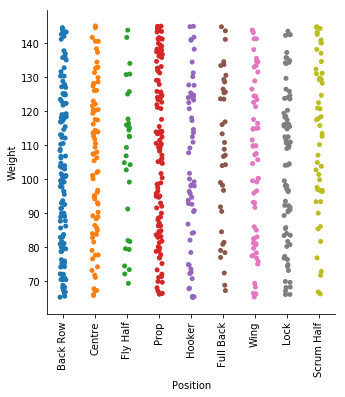

In [56]:
# comparison of weights to position using simulated data

chart = sns.catplot(x="Position", y="Weight",data=Simtable)
chart.set_xticklabels(rotation=90)
plt.show('chart')

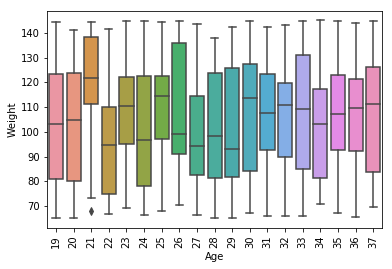

In [60]:
# comparison of weights to age using simulated data

plot = sns.boxplot(x="Age", y="Weight", data=Simtable)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

# Compare diff of plots to original CSV

# References

1. https://teaching.statistics-is-awesome.org/rugby-world-cup-2015-players-data/
2. https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
3. https://www.sharpsightlabs.com/blog/numpy-random-choice/
4. https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/
5. https://www.vitoshacademy.com/using-numpy-for-simulations/
6. https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/data/ipython_cookbook_markov_chain_example.html
7. https://www.datacamp.com/community/tutorials/probability-distributions-python
8. https://www.listendata.com/2019/04/create-dummy-data-in-python.html
9. https://riptutorial.com/pandas/example/19502/create-random-dataframe-and-write-to--csv